<a href="https://www.kaggle.com/code/naji468/random-forest?scriptVersionId=98202556" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import matplotlib.pyplot as plt

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from category_encoders import MEstimateEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from category_encoders import MEstimateEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
data_path = "/kaggle/input/house-prices-advanced-regression-techniques/" 
df_train = pd.read_csv(data_path+"train.csv")
df_test = pd.read_csv(data_path+"test.csv")

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
np.random.seed(386)

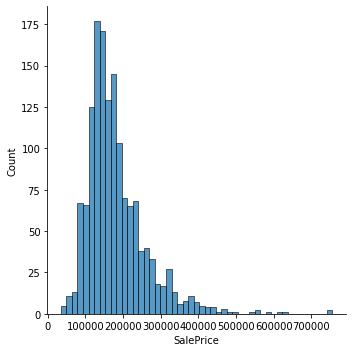

In [5]:
import seaborn as sns
%matplotlib inline

df_train['SalePrice'].describe()
#let's look the target distrubuiation 
sns.displot(df_train['SalePrice']);

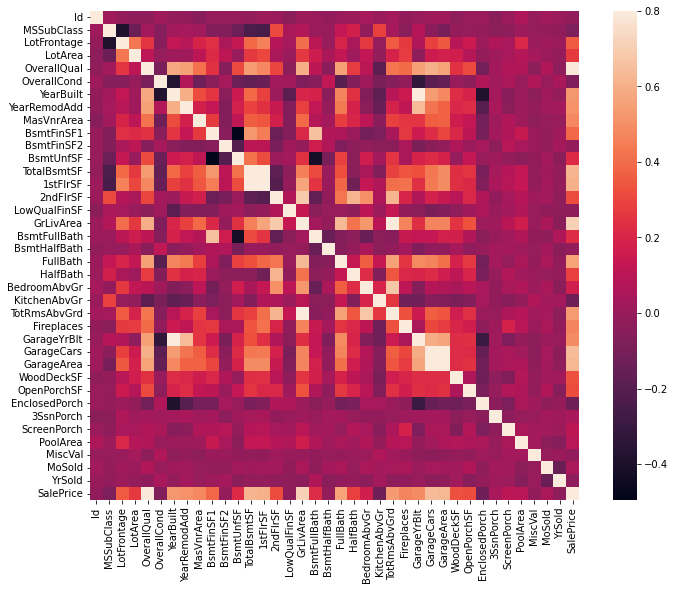

In [6]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

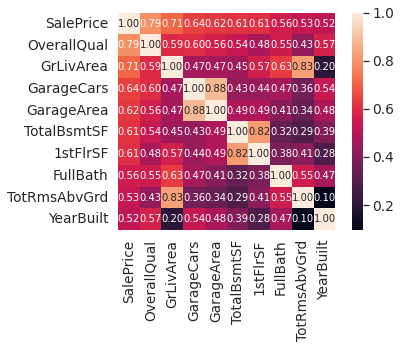

In [7]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [8]:
missed = df_train.isnull().sum()
cells = np.product(df_train.shape)
missed_c = missed.sum()
print("Missed percent: ", missed_c/cells*100)

Missed percent:  5.889565364451209


In [9]:
df_train = df_train.fillna(method="bfill", axis=0).fillna(0)

In [10]:
df = df_train
missed = df.isnull().sum()
cells = np.product(df.shape)
missed_c = missed.sum()
print("Missed percent: ", missed_c/cells*100)

Missed percent:  0.0


In [11]:
features = df_test.columns
X = df_train[features]
Y = df_train.SalePrice
test = df_test[features]


In [12]:

cat_cols = [col for col in features if X[col].dtype == 'object']
encoder = MEstimateEncoder(cols=cat_cols)
X_train = encoder.fit_transform(X, Y)
X_test = encoder.transform(test)
Y_train = Y

In [13]:

my_imputer = SimpleImputer()
X_train = my_imputer.fit_transform(X_train)
X_test = my_imputer.fit_transform(X_test)

In [14]:

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train)

In [15]:
model = RandomForestRegressor()
model.fit(X_train, Y_train)

RandomForestRegressor()

In [16]:
val_pred = model.predict(X_val)

In [17]:
rmse = mean_squared_error(val_pred, Y_val)


In [18]:
print(rmse)

870541637.1327306


In [19]:
predictions = model.predict(X_test)

In [20]:
# Save the predictions to a CSV file
output = pd.DataFrame({'Id': test.Id,
                       'SalePrice': predictions})
output.to_csv('submission.csv', index=False)
